In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
def load_data(data_dir):
    
    directories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]
    
    labels = []
    images = []

    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return images, labels
                    

In [3]:
ROOT_PATH="/Users/krishna/Desktop/"
train_data_dir = os.path.join(ROOT_PATH,"DS/BelgiumTS/Training")
test_data_dir = os.path.join(ROOT_PATH,"DS/BelgiumTS/Testing")

images , labels = load_data(train_data_dir)

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)) , len(images)))

Unique Labels: 62
Total Images: 4575


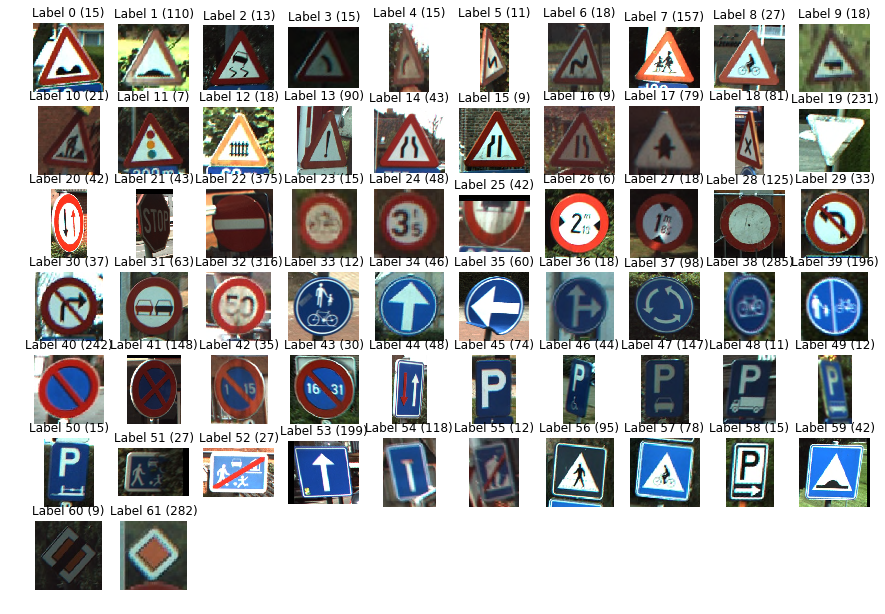

In [5]:
def display_images_and_labels(images, labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15,15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(10,10,i)
        plt.axis("off")
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i+=1
        plt.imshow(image)
    plt.show()

display_images_and_labels(images,labels)    

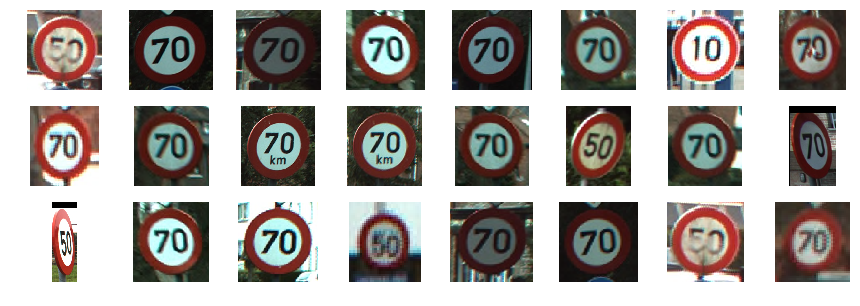

In [6]:
def display_label_images(images, label):
    plt.figure(figsize=(15,5))
    i = 1
    limit = 24
    
    start = labels.index(label)
    end = start + labels.count(label)
    
    for image in images[start:end][:limit]:
        plt.subplot(3,8,i)
        plt.axis("off")
        i+=1
        plt.imshow(image)
    plt.show()
    
display_label_images(images,32)   

In [7]:
for image in images[0:10]:
    print("Shape:{0}, min:{1}, max:{2}".format(image.shape, image.min(), image.max()))

Shape:(144, 141, 3), min:3, max:255
Shape:(183, 187, 3), min:0, max:255
Shape:(244, 253, 3), min:0, max:255
Shape:(99, 97, 3), min:4, max:247
Shape:(145, 146, 3), min:0, max:255
Shape:(219, 217, 3), min:0, max:255
Shape:(88, 86, 3), min:6, max:191
Shape:(93, 85, 3), min:6, max:255
Shape:(99, 103, 3), min:5, max:255
Shape:(205, 127, 3), min:0, max:255


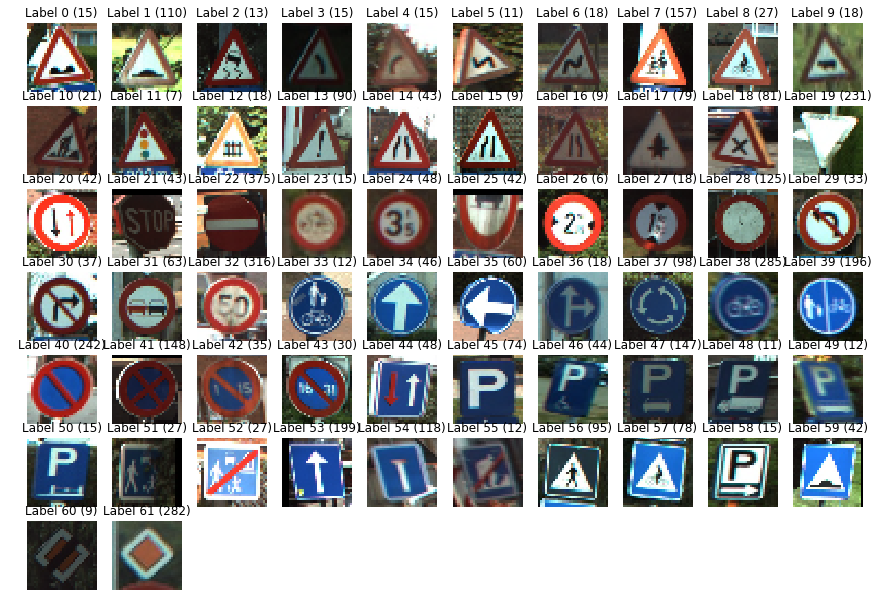

In [8]:
images32 = [skimage.transform.resize(image, (32,32), mode= 'constant' ) for image in images]

display_images_and_labels(images32, labels)

In [9]:
for image in images32[:10]:
    print("Shape:{0}, min:{1}, max:{2}".format(image.shape, image.min(), image.max()))

Shape:(32, 32, 3), min:0.06064644607842874, max:0.984175857843137
Shape:(32, 32, 3), min:0.03687097886029357, max:1.0
Shape:(32, 32, 3), min:0.0444508272058822, max:0.9980583639705882
Shape:(32, 32, 3), min:0.06574754901960735, max:0.9211693857230405
Shape:(32, 32, 3), min:0.05080039828431377, max:1.0
Shape:(32, 32, 3), min:0.04459443933823515, max:1.0
Shape:(32, 32, 3), min:0.047288602941176205, max:0.7209712009803924
Shape:(32, 32, 3), min:0.03818646599264785, max:1.0
Shape:(32, 32, 3), min:0.06485045189950978, max:1.0
Shape:(32, 32, 3), min:0.0, max:1.0


In [10]:
labels_a = np.array(labels)
images_a = np.array(images32)

print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [11]:
graph = tf.Graph()

with graph.as_default():
    
    images_ph = tf.placeholder(tf.float32, [None,32,32,3])
    labels_ph = tf.placeholder(tf.int32,[None])
    
    images_flat = tf.contrib.layers.flatten(images_ph)
    
    
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
    
    predicted_labels = tf.argmax(logits, 1)
    
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = labels_ph))
    
    train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
    
    init = tf.global_variables_initializer()

    
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [12]:
session = tf.Session(graph=graph)

session.run([init])

[None]

In [13]:
for i in range(501):
    _, loss_value = session.run([train, loss], feed_dict = {images_ph: images_a , labels_ph: labels_a})
    
    if i%10 == 0 :
        print("loss: ", loss_value)

loss:  4.17957
loss:  2.94702
loss:  2.47362
loss:  2.22974
loss:  2.08486
loss:  1.98536
loss:  1.91123
loss:  1.85299
loss:  1.80551
loss:  1.76591
loss:  1.73221
loss:  1.70306
loss:  1.67753
loss:  1.65495
loss:  1.63483
loss:  1.61677
loss:  1.60048
loss:  1.58571
loss:  1.57225
loss:  1.55994
loss:  1.54863
loss:  1.53822
loss:  1.52861
loss:  1.51971
loss:  1.51144
loss:  1.50374
loss:  1.49654
loss:  1.4898
loss:  1.48348
loss:  1.47754
loss:  1.47195
loss:  1.46667
loss:  1.46168
loss:  1.45696
loss:  1.45248
loss:  1.44824
loss:  1.4442
loss:  1.44037
loss:  1.43671
loss:  1.43323
loss:  1.4299
loss:  1.42672
loss:  1.42368
loss:  1.42077
loss:  1.41798
loss:  1.4153
loss:  1.41273
loss:  1.41027
loss:  1.4079
loss:  1.40563
loss:  1.40344


In [14]:
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

predicted = session.run([predicted_labels], feed_dict = {images_ph: sample_images})[0]

print(sample_labels)
print(predicted)

[7, 45, 38, 32, 57, 2, 31, 61, 24, 49]
[ 7  0 39 32 57 18 31 61 32 47]


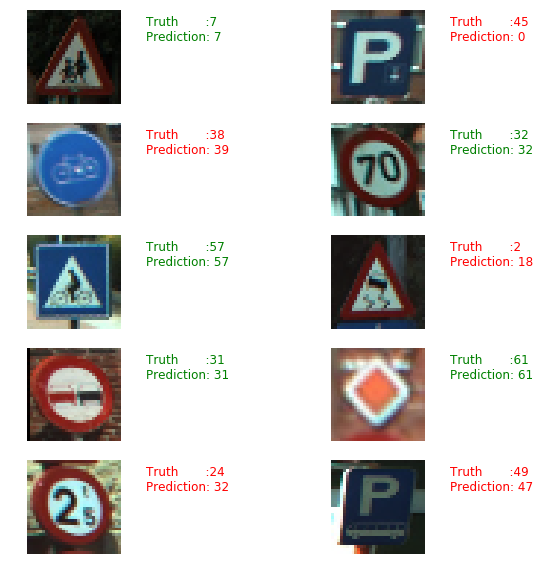

In [15]:
fig = plt.figure(figsize = (10,10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5,2,1+i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(40,10,"Truth       :{0}\nPrediction: {1}".format(truth, prediction), fontsize = 12 , color = color)
    plt.imshow(sample_images[i])

In [16]:
test_images, test_labels = load_data(test_data_dir)

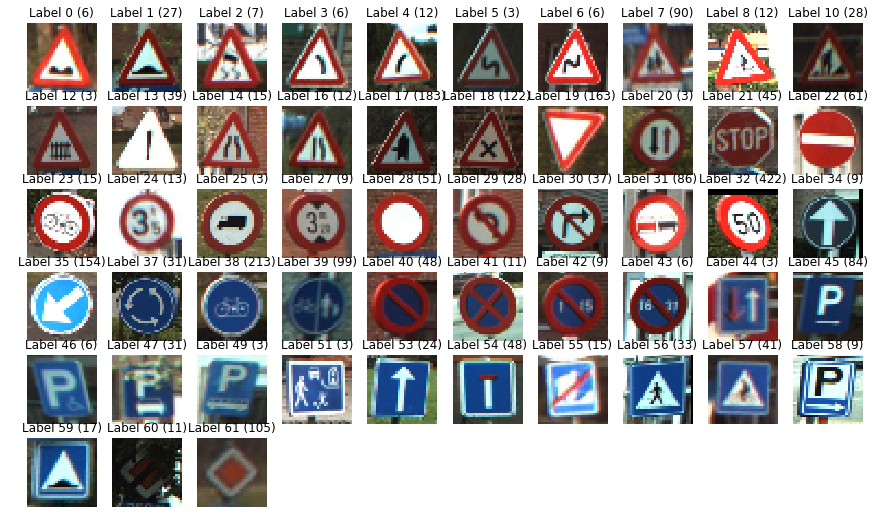

In [17]:
test_images32 = [skimage.transform.resize(image, (32,32), mode = 'constant') for image in test_images]
display_images_and_labels(test_images32, test_labels)

In [18]:
predicted = session.run([predicted_labels], feed_dict={images_ph: test_images32})[0]

match_count = sum([int(y == y_) for y,y_ in zip(test_labels, predicted)])

accuracy = match_count/len(test_labels)

print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.673


In [19]:
session.close()